In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
k = 99
N = 100
h = 1/((k+1))
t = np.arange(0, 1, (1/((k+1)*N)))


c = np.ones(k)

In [7]:
def H(x):
    return (np.sign(x)+abs(np.sign(x)))/2

def H1(x):
    return (H(x) + (H(1-x))) - 1

def Hi(x, i, K = k):
    return H1((x)*(K+1)/2 - (i-1)/2)

def e(x):
    return 1 - abs(x)

def ei(x, i, K = k): 
    return e((K+1)*x - i) * Hi(x, i, K)




def e_prime(x):
    return -np.sign(x)

def ei_prime(x, i, K = k): 
    return e_prime((K+1)*x - i) * Hi(x, i, K) * (K+1)



c = np.ones(k)

def ci(x, i, K = k):
    return c[i-1] * Hi(x, i, K)




def ui(x, i):
    return ci(x, i) * ei(x, i)

def U():
    p = np.zeros((k, (k+1)*N))

    for i in range(1, k+1):
        # p[i-1] = ci(t, i)*ui(t, i)
        p[i-1] = ui(t, i)

    g = np.zeros((k+1)*N)
    for i in range(0, k):
        g += p[i]

    return g




def ui_prime(x, i):
    return ci(x, i) * ei_prime(x, i)

def U_prime():
    p = np.zeros((k, (k+1)*N))

    for i in range(1, k+1):
        # p[i-1] = ci(t, i)*ui_prime(t, i)
        p[i-1] = ui_prime(t, i)

    g = np.zeros((k+1)*N)
    for i in range(0, k):
        g += p[i]

    return g




def I(f):
    s = 0
    for i in range(len(t)):
        s += f[i]

    return s*h/N

def I1(f):
    s = 0
    for i in range(len(t)):
        s += f[i]
    return s*h/N/2

def I2(f):
    s = 0
    for i in range(len(t)):
        s += (t[i]**2+1)*np.log(f[i]**2+1)/2  -  (t[i]**2+1)*f[i]*np.arctan(f[i])  +  2*f[i]**2
    return s*h/N

def I3(f):
    s = 0
    for i in range(len(t)):
        s += f[i]

    return s*h/N




def OI(mom):
    global c
    if (mom==c).all():
        return I1(U_prime()) + I2(U()) + I3(U())
    else:
        temp = c.copy()
        c = mom.copy()
        p = OI(c)
        c = temp.copy()
        return p




def grad_OI(mom = np.zeros(k)):
    global c
    if (mom==c).all(): 
        p = c.copy()
        for i in range(k):
            temp = OI(c)
            c[i] += h
            p[i] = (OI(c) - temp)/h
            c[i] -= h
        return p
    else:
        temp = c.copy()
        c = mom.copy()
        p = grad_OI(c)
        c = temp.copy()
        return p
    



def step():
    global c
    p = c.copy()
    w = 2
    grad = grad_OI(c)
    counter = 0
    flag = 0

    while(counter < 10) and (OI(c-w*grad) > OI(c)):
        w = w/2
        counter += 1
    if OI(c-w*grad) > OI(c): flag = 1
    c = c - w*grad
    return flag

In [ ]:
i = 0
while step() == 0:
    i+=1

print(i)

In [10]:
U = U()

TypeError: 'numpy.ndarray' object is not callable

In [19]:
U = np.loadtxt("file.txt", dtype=float)
len(U)

10000

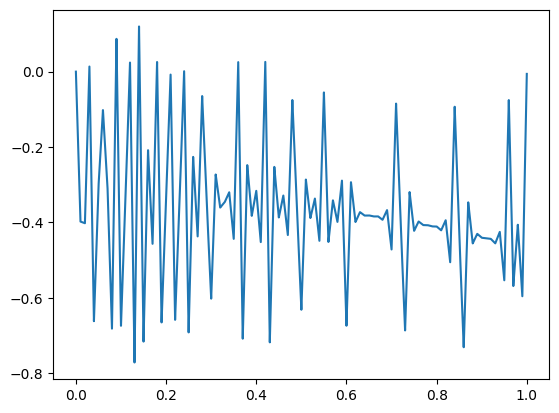

In [20]:


plt.plot(t, U)
plt.show()

In [46]:
# with open("file.txt", "w") as output:
#     for i in U():
#         output.write(str(i) + ' ')

In [22]:
def pr_2_dir(A):
    U = A.copy()
    v = np.zeros(((k+1)*N))

    v[0] = U[1] - U[0]

    for i in range(1, len(U)-1):
        v[i] = U[i+1] - U[i]

    v[-1] = U[-1] - U[-2]

    v = v/h

    u = np.zeros(((k+1)*N))

    u[0] = v[1] - v[0]

    for i in range(1, len(v)-1):
        u[i] = v[i+1] - v[i]

    u[-1] = v[-1] - v[-2]

    u = u/h



    # plt.plot(t, u)
    # plt.show()

    return u

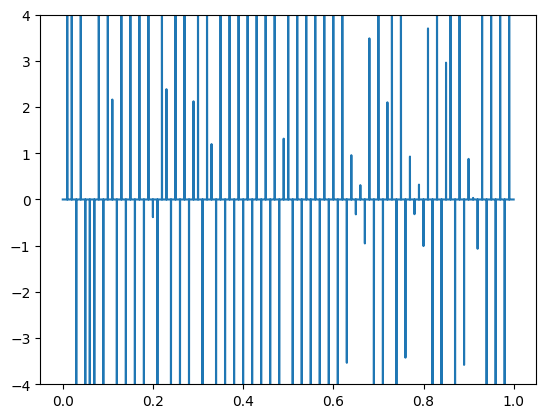

In [34]:
u_pp = pr_2_dir(U)

plt.plot(t, u_pp)
plt.ylim(-4, 4)

plt.show()

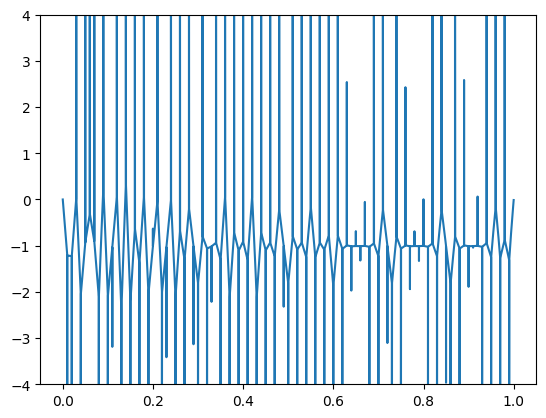

In [35]:
plt.plot(t, -u_pp + 4*U - (1+t**2)*np.arctan(U))
plt.ylim(-4, 4)

# z = np.polyfit (t, U,)
# p = np.poly1d (z)

# #add trendline to plot
# plt.plot (t, p(t)) 
plt.show()

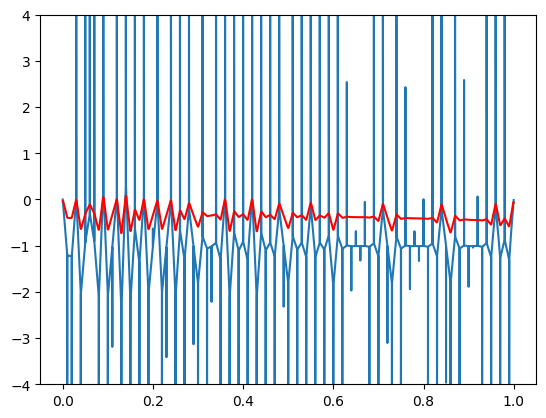

In [40]:
from scipy.signal import savgol_filter

plt.plot(t, -u_pp + 4*U - (1+t**2)*np.arctan(U))
plt.ylim(-4, 4)

y_smooth = savgol_filter(U, 20, 0)
plt.plot(t, y_smooth, color='red', label='Сглаженные данные')


plt.show()